In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the dataset "diabetes.sv" in a dataframe
df = pd.read_csv('data/diabetes.csv')

# EDA

In [4]:
# Use the describe method and explain the results
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# Check for NULL item in the dataframe
df[df.isnull().values==True]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [28]:
# Check the distribution of the target (Outcome) and show the count and show the distribution ratio
x = df['Outcome'].value_counts()[0]
y = df['Outcome'].value_counts()[1]

print('the value 0 has the count',x)
print('the value 1 has the count',y)

distribution_ratio= x/y

print('the distribution ratio is ', distribution_ratio)



the value 0 has the count 500
the value 1 has the count 268
the distribution ratio is  1.8656716417910448


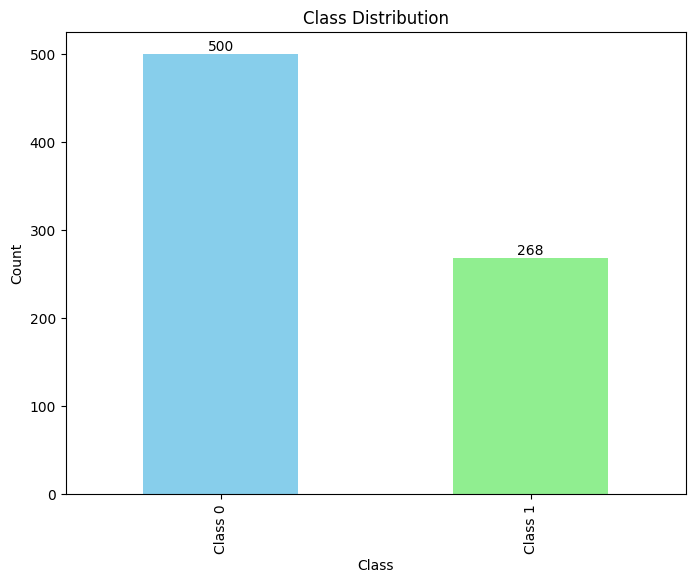

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the counts
data = {
    'Class': ['Class 0', 'Class 1'],
    'Count': [x, y]
}
pf = pd.DataFrame(data)

# Create a bar plot with customization
ax = pf.plot(kind='bar', x='Class', y='Count', legend=False, color=['skyblue', 'lightgreen'], figsize=(8, 6))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

In [48]:
# Check the range of data from the above describe method on each feature column
description_stats= {}
for i in df.columns:
    description_stats[i]= df[i].describe()
description_stats

{'Pregnancies': count    768.000000
 mean       3.845052
 std        3.369578
 min        0.000000
 25%        1.000000
 50%        3.000000
 75%        6.000000
 max       17.000000
 Name: Pregnancies, dtype: float64,
 'Glucose': count    768.000000
 mean     120.894531
 std       31.972618
 min        0.000000
 25%       99.000000
 50%      117.000000
 75%      140.250000
 max      199.000000
 Name: Glucose, dtype: float64,
 'BloodPressure': count    768.000000
 mean      69.105469
 std       19.355807
 min        0.000000
 25%       62.000000
 50%       72.000000
 75%       80.000000
 max      122.000000
 Name: BloodPressure, dtype: float64,
 'SkinThickness': count    768.000000
 mean      20.536458
 std       15.952218
 min        0.000000
 25%        0.000000
 50%       23.000000
 75%       32.000000
 max       99.000000
 Name: SkinThickness, dtype: float64,
 'Insulin': count    768.000000
 mean      79.799479
 std      115.244002
 min        0.000000
 25%        0.000000
 50%    

In [50]:
#for example 

description_stats['Age']

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [61]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
# Do the scaling using StandardScaler on the columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df.iloc[:,:-1])

datafr = pd.DataFrame(scaled_df)

In [69]:
datafr

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [70]:
datafr.columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [71]:
datafr['Outcome']= df['Outcome']

In [72]:
datafr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


## Modeling

In [80]:
# Load and split the dataset into train, and test
# Note that while splitting try to maintain the ratio of Outcome in the train, and test and show us that ratio (hint: use stratify)
# 
X = datafr.iloc[:,:-1]
y = datafr.iloc[:,-1]


In [81]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [82]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75,stratify=y, random_state=42)

## Modeling 1

In [85]:
# Use DecisionTreeClassifer and cross_val_score to get scores on the dataset
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 0.5671641791044776
F1 Score: 0.6129032258064516


In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X , y, cv=8, scoring='precision')

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", scores)

Cross-validation scores: [0.55882353 0.63333333 0.46341463 0.53846154 0.625      0.5862069
 0.60714286 0.62857143]


In [92]:
# Get the score mean
print('the mean of the scores in precision criterion are ',scores.mean())

the mean of the scores are  0.5801192772023736


## Modeling 2

In [95]:
# use BaggingClassifer and for base_estimator use DecisionTreeClassifier
# use n_estimator 100
# use max-samples 80%
# calculate oob score
# set random state in all cases
from sklearn.ensemble import BaggingClassifier
model= BaggingClassifier(estimator= DecisionTreeClassifier(),n_estimators=100,max_samples=0.80,bootstrap=True,oob_score=True,random_state=42)


In [96]:
# Fit the model
model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=42)

In [97]:
# calculate oob score
print(model.oob_score_)

0.7534722222222222


In [98]:
# calculate the score on test dataset
test_score = model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.7552083333333334


In [99]:
# Pass the Baggingmodel classifier to cross_val_score and get the scores and then calculate the mean of the scores.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X , y, cv=8, scoring='precision')

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", scores)

Cross-validation scores: [0.64705882 0.77419355 0.56097561 0.72222222 0.75       0.7826087
 0.76923077 0.7       ]


In [100]:
print('the mean of the scores in precision criterion are ',scores.mean())

the mean of the scores in precision criterion are  0.7132862085972215


## Modeling 3

In [101]:
# Use RandomForestClassifier
# Pass the classifier to cross_val_score and calculate the scores (e.g. use cv = 5 default)
# Calculate the mean of the scores.
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier()
rmodel.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,-0.844885,0.003301,0.459827,1.158182,-0.050356,0.889377,-0.636871,-0.445935
358,2.421746,-1.029505,0.253036,1.220910,-0.224014,0.419775,-0.283518,1.255820
718,-0.844885,-0.403562,-0.470732,1.597279,0.852665,0.445159,-0.171773,-0.786286
536,-1.141852,-0.497453,1.080200,-1.288212,-0.692891,-0.303664,-0.830159,1.085644
651,-0.844885,-0.121888,-0.470732,0.154533,0.227496,0.229397,-0.017747,-0.531023
...,...,...,...,...,...,...,...,...
676,1.530847,1.098701,0.873409,-1.288212,-0.692891,-0.912877,-0.730495,1.681259
113,0.046014,-1.405071,-0.367337,-1.288212,-0.692891,0.254780,-0.244256,-0.701198
556,-0.844885,-0.747831,0.046245,1.220910,-0.692891,0.775149,-0.766737,-0.275760
152,1.530847,1.098701,0.873409,0.468173,0.652958,0.292856,2.165799,0.745293


In [104]:
y_test

635    1
698    0
637    0
402    1
425    1
      ..
62     0
477    0
311    0
116    1
541    1
Name: Outcome, Length: 192, dtype: int64

In [105]:
y_pred= rmodel.predict(X_test)

In [106]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rmodel,X , y, cv=5, scoring='precision')

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", scores)

Cross-validation scores: [0.69565217 0.60377358 0.77419355 0.8        0.70731707]


In [107]:
print('the mean of the scores in precision criterion are ',scores.mean())

the mean of the scores in precision criterion are  0.7161872760753063
